# 3.1 準備と簡易デモザイク

## この節について

この節ではまずRAW画像を準備し、簡易的なデモザイクを行ってみます。

この節のの内容はColabノートブックとして公開してあります。ノートブックを見るには[目次ページ](https://colab.research.google.com/github/moizumi99/camera_raw_processing/blob/master/camera_raw_toc.ipynb)から参照するか、以下のリンクを使ってアクセスしてください。

https://colab.research.google.com/github/moizumi99/camera_raw_processing/blob/master/camera_raw_chapter_3_1.ipynb

## RAW画像の準備

まずRAW画像を用意します。今回はSony α 7 IIIで撮影したこの画像を使います。

  ![最終的な画像](https://github.com/moizumi99/camera_raw_processing/raw/master/fig2_1.png "最終的な画像")

ここで表示している画像は使用するRAWファイルから作成したRGB画像（PNGファイル）です。

元になるRAWファイルはこのURLにあります。

https://raw.githubusercontent.com/moizumi99/raw_process/master/sample.ARW

では、colab上にダウンロードしてみましょう。

In [1]:
!wget https://raw.githubusercontent.com/moizumi99/raw_process/master/sample.ARW

--2019-01-26 10:54:31--  https://raw.githubusercontent.com/moizumi99/raw_process/master/sample.ARW
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.188.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.188.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24746752 (24M) [application/octet-stream]
Saving to: ‘sample.ARW.1’

sample.ARW.1        100%[===================>]  23.60M  52.3MB/s    in 0.5s    

2019-01-26 10:54:32 (52.3 MB/s) - ‘sample.ARW.1’ saved [24746752/24746752]



自分で撮影したRAWデータを使用する場合は次のコマンド利用してください。

In [2]:
# from google.colab import files
# uploaded = files.upload()

使いやすいようにRAWファイル名を変数に保存しておきます。

自分でアップロードしたファイルを使用する場合は、ファイル名を対象のファイルに書き換えてください。

In [3]:
raw_file  = "sample.ARW"

## RAW画像の読み込み

まず必用なモジュールをインストールします。

まずインストールするのはrawpyです。

rawpyはpythonでRAW画像を操作するためのモジュールです。

https://pypi.org/project/rawpy/

rawpyを使うとRAW画像からRAW画像データを取り出したり、画像サイズなどのパラメータを読み出したり、また簡易現像をすることができます。

rawpyの使用法については実際に使う時に説明します。

In [4]:
!pip install rawpy


colabではコマンドの最初に!をつけると、linuxコマンドが実行できます。pipはpythonのモジュール管理用のコマンドです。

次にimageioをインストールします。

imageioは画像の表示やロード・セーブなどを行うモジュールです。

In [5]:
!pip install imageio

次にこれらのモジュールをインポートします。

In [6]:
import rawpy, imageio

他に必用なモジュールがある場合はその都度importすることにします。

では先程ダウンロードしたRAWファイルをrawpyを使って読み出してみましょう。

`imread()`はrawデータをファイルから読み込むrawpyのメソッドです。

In [7]:
raw = rawpy.imread(raw_file)

読み込みがうまくいったか確認を兼ねてRAWデータの情報を見てみましょう。

まず、画像サイズを確認します。読み込んだRAWデータは、sizesというアトリビュートでサイズ確認ができます。

In [8]:
print(raw.sizes)

ImageSizes(raw_height=4024, raw_width=6048, height=4024, width=6024, top_margin=0, left_margin=0, iheight=4024, iwidth=6024, pixel_aspect=1.0, flip=0)


raw_heightとraw_widthはRAWデータのサイズです。この画像のサイズは縦4024ライン、横6048画素、ということになります。

heightとwidthは、画像処理後の出力画像のサイズです。

他の値についてはrawpyのページで解説されています。

https://letmaik.github.io/rawpy/api/rawpy.RawPy.html#rawpy.RawPy.sizes

この画像を処理しやすくするために、numpyを使用します。

numpyはpython用の数値計算ライブラリーです。行列処理の機能が豊富なので画像処理にも向いています。

まず、numpyをnpという名前でインポートします。

In [9]:
import numpy as np

次にraw画像データから数値データのみをnumpyの配列に読み込みます。

In [10]:
raw_array = raw.raw_image

raw_imageはRAW画像データをnumpyの配列して渡すアトリビュートです。

このままでは１次元配列で扱いにくいので、reshapeを使って２次元配列に変換します。

In [11]:
h, w = raw.sizes.raw_height, raw.sizes.raw_width
raw_array = raw_array.reshape((h, w))

これでraw_arrayは4024 x 6048の２次元配列になりました。


画像データを表示するコマンドimshowを使って、画像として確認してみましょう。

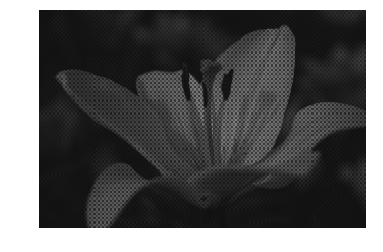

In [23]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

# raw_arrayの中のデータをグレースケールで表示します。
imshow(raw_array, cmap='gray')
# 軸を非表示にします。
plt.axis('off')
# 実際に表示します。
plt.show()

ここでmatplotlibはnumpy用描画ライブラリーです。その中でpyplotは各種グラフを表示するモジュールです。ここではpltという名前でインポートしています。

## この節のまとめ

必用なモジュールをインポートしてRAW画像をcolab上に読み込みました。